## Mental Health Data

In [ ]:
import os
os.system('jupyter nbconvert --to html *.ipynb')

In [1]:
import pandas as pd
import numpy as np
df = pd.read_excel('Mental Health Data.xlsx')

In [2]:
df

,Country,Current_Health_Expenditures_(Percent_ of_GDP),Happiness_Rank,Happiness_Score,Lower_Confidence_Interval,Upper_Confidence_Interval,Economy_(GDP_per_Capita),Family,Health_(Life_Expectancy),Freedom,...,Mental _hospitals,health_units,outpatient _facilities,Psychiatrists,Nurses,Social_workers,Psychologists,Population,GDP,Region
0,Afghanistan,10.962000,154.0,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,...,0.003,0.012,0.006,0.231,0.098,NaN,0.296,35383128,1.801775e+10,Southern Asia
1,Albania,4.916020,109.0,4.655,4.546,4.764,0.95530,0.50163,0.73007,0.31866,...,0.068,0.068,0.410,1.471,6.876,1.060,1.231,2876101,1.186120e+10,Central and Eastern Europe
2,Algeria,6.607782,38.0,6.355,6.227,6.483,1.05266,0.83309,0.61804,0.21006,...,0.048,0.068,0.048,NaN,NaN,NaN,NaN,40551404,1.599948e+11,Middle East and Northern Africa
3,Angola,2.713150,141.0,3.866,3.753,3.979,0.84731,0.66366,0.04991,0.00589,...,0.011,NaN,NaN,0.057,0.660,0.022,0.179,28842484,1.011239e+11,Sub-Saharan Africa
4,Argentina,9.001897,26.0,6.650,6.560,6.740,1.15137,1.06612,0.69711,0.42284,...,0.937,1.071,1.720,21.705,NaN,NaN,222.572,43590368,5.575314e+11,Latin America and Caribbean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,"Venezuela, RB",5.226116,44.0,6.084,5.973,6.195,1.13367,1.03302,0.61904,0.19847,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29846179,NaN,Latin America and Caribbean
153,Vietnam,5.659194,96.0,5.061,4.991,5.131,0.74037,0.79117,0.66157,0.55954,...,0.043,0.017,0.009,NaN,NaN,NaN,NaN,93638724,2.052762e+11,Southeastern Asia
154,"Yemen, Rep.",NaN,147.0,3.724,3.621,3.827,0.57939,0.47493,0.31048,0.22870,...,0.033,0.026,0.063,0.201,0.323,0.056,0.409,27168210,3.093598e+10,Middle East and Northern Africa
155,Zambia,4.477207,106.0,4.795,4.645,4.945,0.61202,0.63760,0.23573,0.42662,...,0.062,0.062,0.205,0.056,1.429,0.019,0.031,16363507,2.095475e+10,Sub-Saharan Africa


In [3]:
df.columns

Index(['Country', 'Current_Health_Expenditures_(Percent_ of_GDP)',
       'Happiness_Rank', 'Happiness_Score', 'Lower_Confidence_Interval',
       'Upper_Confidence_Interval', 'Economy_(GDP_per_Capita)', 'Family',
       'Health_(Life_Expectancy)', 'Freedom', 'Trust_(Government_Corruption)',
       'Generosity', 'Dystopia_Residual', 'Age_Standarized_Suicide_Rate',
       'Mental _hospitals', 'health_units', 'outpatient _facilities',
       'Psychiatrists', 'Nurses', 'Social_workers', 'Psychologists',
       'Population', 'GDP', 'Region'],
      dtype='object')

# Visualization

### Scatter Plots

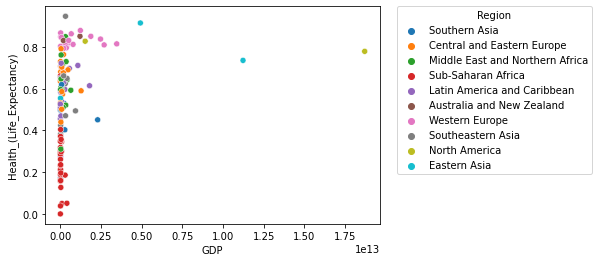

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df, y="Health_(Life_Expectancy)", x="GDP", hue='Region')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Region")

In [5]:
# Create a new variable
df['log_GDP'] = np.log(df['GDP'])

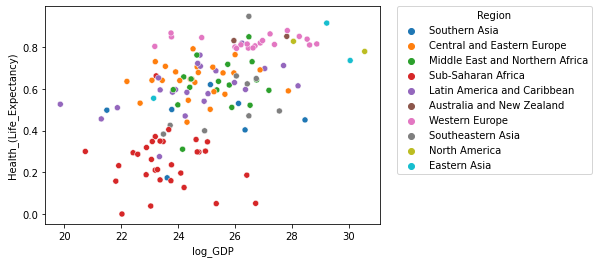

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df, y="Health_(Life_Expectancy)", x='log_GDP', hue='Region')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Region")

## Line Plot

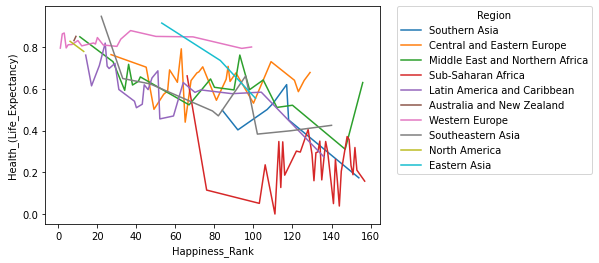

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(data=df, y="Health_(Life_Expectancy)", x='Happiness_Rank', hue='Region')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Region")

## Create new variables

#### Continuous to Categorical

In [22]:
df['Happy'] = ['Not_Happy' if i<df['Happiness_Score'].quantile(.33) 
                           else ('Neutral' if i<=df['Happiness_Score'].quantile(.67) 
                           else 'Happy') 
                           for i in df['Happiness_Score']]

In [23]:
df['Rich'] = ['Poor' if i<df['Economy_(GDP_per_Capita)'].quantile(.33) 
                     else ('Neutral' if i<=df['Economy_(GDP_per_Capita)'].quantile(.67) 
                     else 'Rich') 
                     for i in df['Economy_(GDP_per_Capita)']]

In [10]:
df.dtypes

Country                                           object
Current_Health_Expenditures_(Percent_ of_GDP)    float64
Happiness_Rank                                   float64
Happiness_Score                                  float64
Lower_Confidence_Interval                        float64
Upper_Confidence_Interval                        float64
Economy_(GDP_per_Capita)                         float64
Family                                           float64
Health_(Life_Expectancy)                         float64
Freedom                                          float64
Trust_(Government_Corruption)                    float64
Generosity                                       float64
Dystopia_Residual                                float64
Age_Standarized_Suicide_Rate                     float64
Mental _hospitals                                float64
health_units                                     float64
outpatient _facilities                           float64
Psychiatrists                  

#### Categorical to Categorical

In [26]:
df['Region'].value_counts()

Sub-Saharan Africa                 34
Central and Eastern Europe         25
Latin America and Caribbean        23
Western Europe                     20
Middle East and Northern Africa    18
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        3
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64

In [31]:
df['Region2']= ['Asia' if i in ['Southeastern Asia', 'Southern Asia', 'Eastern Asia'] 
                       else ('Europe' if i in ['Central and Eastern Europe', 'Western Europe'] 
                       else  'Africa' if i in ['Sub-Saharan Africa', 'Middle East and Northern Africa']  
                       else 'Others')       
                       for i in df['Region']]

In [34]:
df['Region2'].value_counts()

Africa    52
Europe    45
Others    41
Asia      19
Name: Region2, dtype: int64

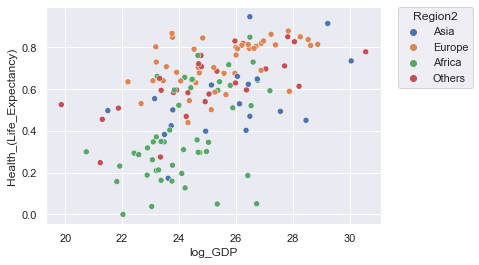

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df, y="Health_(Life_Expectancy)", x='log_GDP', hue='Region2')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Region2")

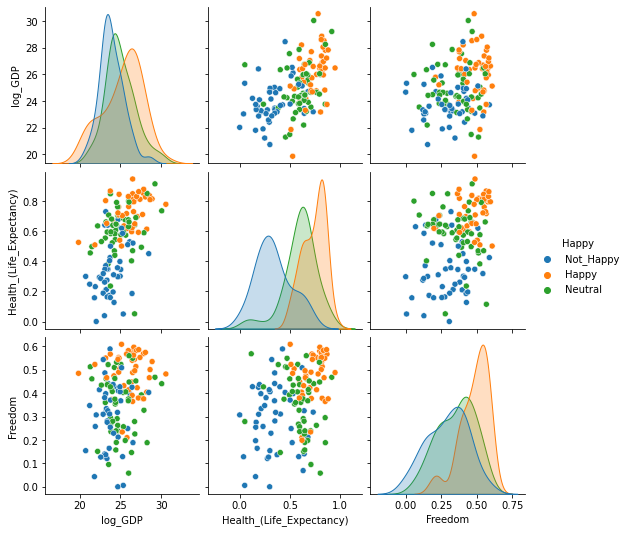

In [11]:
df1 = df[['log_GDP', 'Population','Health_(Life_Expectancy)', 'Freedom','Happy']]
sns.pairplot(df1, hue="Happy")

## Boxplots

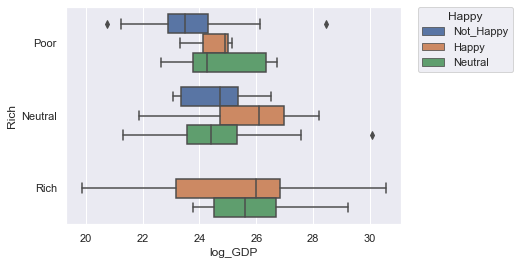

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.set_theme()
ax = sns.boxplot(x="log_GDP", y='Rich',data=df, hue='Happy')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Happy")

## Distribution Plots

<AxesSubplot:xlabel='Happiness_Score', ylabel='Density'>

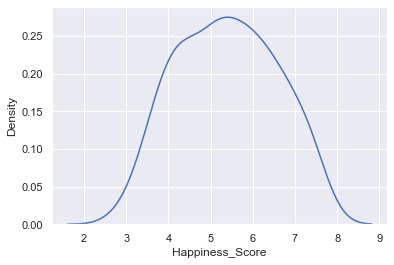

In [13]:
sns.kdeplot(x = 'Happiness_Score', data=df)

<AxesSubplot:xlabel='log_GDP', ylabel='Density'>

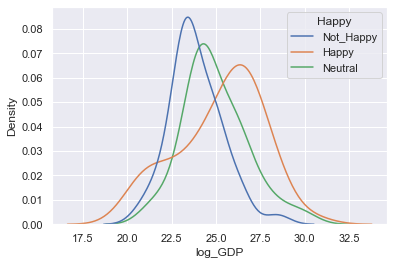

In [14]:
sns.kdeplot(x = 'log_GDP', hue = 'Happy', data=df)

### Hypothesis Testing

#### 1. Two categorical variables

- Association Test (Chi-square test of independence)

In [56]:
import pandas
from scipy.stats import chi2_contingency

def chisq_of_df_cols(df, c1, c2):
    groupsizes = df.groupby([c1, c2]).size()
    ctsum = groupsizes.unstack(c1)
    # fillna(0) is necessary to remove any NAs which will cause exceptions
    return(chi2_contingency(ctsum.fillna(0))[1])

In [60]:
print('p-value is: ', chisq_of_df_cols(df, 'Happy', 'Region2'))

p-value is:  2.003259244116354e-12


In [61]:
print(chisq_of_df_cols(df, 'Rich', 'Region2'))

2.6555789860307423e-09


#### 2. One categorical, one continuous variable

-  ANOVA

In [78]:
from scipy.stats import f_oneway
pvalue = f_oneway(*[s for idx, s in df.dropna().groupby('Happy')['GDP']])[1]
print('p-value is: ', pvalue)

p-value is:  0.34785583665400355


In [81]:
from scipy.stats import f_oneway
pvalue = f_oneway(*[s for idx, s in df.dropna().groupby('Region2')['GDP']])[1]
print('p-value is: ', pvalue)

p-value is:  0.31664891312550747


#### 3. Two continuous variables

- Correlation 

In [92]:
coef = np.corrcoef(df.dropna()['GDP'], df.dropna()['Happiness_Score'])[1][0]
print('Correlation is: ', coef)

Correlation is:  0.3333067226196712
